# **Application of Large Language Models: Named-Entity Recognition (NER)**

**Introduction**

Named Entity Recognition (NER) is a crucial process in Natural Language Processing (NLP) that focuses on identifying and classifying entities such as names, dates, locations, organizations, and other specific terms within a text. By converting unstructured data into structured information, NER plays a vital role in enhancing the efficiency of various text-related tasks. These tasks include information retrieval, text mining, and question answering, where the extraction of relevant entities can significantly improve the accuracy and relevance of the results.

**Objective**

The objective of this notebook is to explore and implement Named Entity Recognition (NER) techniques to identify and classify entities within a given text. This notebook aims to demonstrate how NER can be applied to extract structured information from unstructured data, thereby facilitating tasks such as information retrieval, text mining, and question answering. Through this notebook, we will delve into different NER models and evaluate their performance on sample datasets.

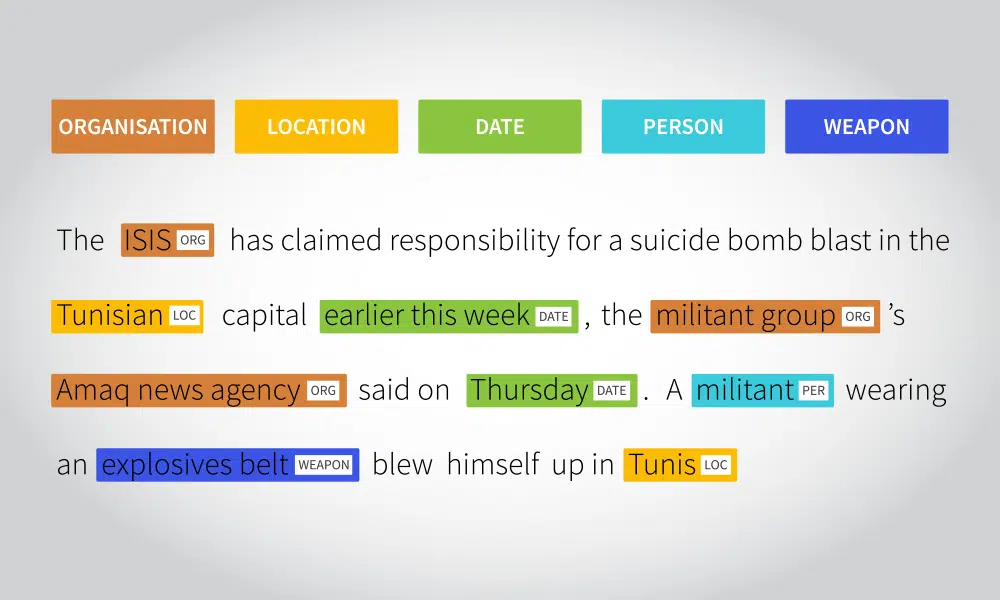

## **Downloading the Packages**

In [ ]:
!pip install datasets transformers tokenizers seqeval -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == 

## **Import Packages**

In [ ]:
# import packages

import numpy as np
import datasets

from transformers import BertTokenizerFast
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForTokenClassification
from transformers import TrainingArguments, Trainer

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

from transformers import Trainer, AdamW, get_linear_schedule_with_warmup

## **Load Dataset and Anlaysis**

CoNLL-2003 is a dataset for named entity recognition containing annotated text with entities like persons, locations, organizations, and more.

In [ ]:
# download and load the dataset

conll_data = datasets.load_dataset("conll2003") # In this line we fetch the dataset from hugging face

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
# see the dataset
conll_data

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

There are three files in dataset which are train, test and validation.

In [ ]:
# checking the description of the train data
conll_data['train'].description

'The shared task of CoNLL-2003 concerns language-independent named entity recognition. We will concentrate on\nfour types of named entities: persons, locations, organizations and names of miscellaneous entities that do\nnot belong to the previous three groups.\n\nThe CoNLL-2003 shared task data files contain four columns separated by a single space. Each word has been put on\na separate line and there is an empty line after each sentence. The first item on each line is a word, the second\na part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag. The chunk tags\nand the named entity tags have the format I-TYPE which means that the word is inside a phrase of type TYPE. Only\nif two phrases of the same type immediately follow each other, the first word of the second phrase will have tag\nB-TYPE to show that it starts a new phrase. A word with tag O is not part of a phrase. Note the dataset uses IOB2\ntagging scheme, whereas the original dataset uses 

In [ ]:
# checking the data
conll_data['train'][5]

{'id': '5',
 'tokens': ['"',
  'We',
  'do',
  "n't",
  'support',
  'any',
  'such',
  'recommendation',
  'because',
  'we',
  'do',
  "n't",
  'see',
  'any',
  'grounds',
  'for',
  'it',
  ',',
  '"',
  'the',
  'Commission',
  "'s",
  'chief',
  'spokesman',
  'Nikolaus',
  'van',
  'der',
  'Pas',
  'told',
  'a',
  'news',
  'briefing',
  '.'],
 'pos_tags': [0,
  28,
  41,
  30,
  37,
  12,
  16,
  21,
  15,
  28,
  41,
  30,
  37,
  12,
  24,
  15,
  28,
  6,
  0,
  12,
  22,
  27,
  16,
  21,
  22,
  22,
  14,
  22,
  38,
  12,
  21,
  21,
  7],
 'chunk_tags': [0,
  11,
  21,
  22,
  22,
  11,
  12,
  12,
  17,
  11,
  21,
  22,
  22,
  11,
  12,
  13,
  11,
  0,
  0,
  11,
  12,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  21,
  11,
  12,
  12,
  0],
 'ner_tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  1,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0]}

In [ ]:
# check total classes presnt
conll_data["train"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

From the above cell it looks there are total 9 classes present in the dataset.

## **Download and Load Models and Tokenizer**

Tokenizer is a tool that converts raw text into token IDs, which are input for models like BERT.

In [ ]:
# download and load tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BERT is a pre-trained transformer model that captures context from both directions in text to enhance understanding and performance in various NLP tasks.

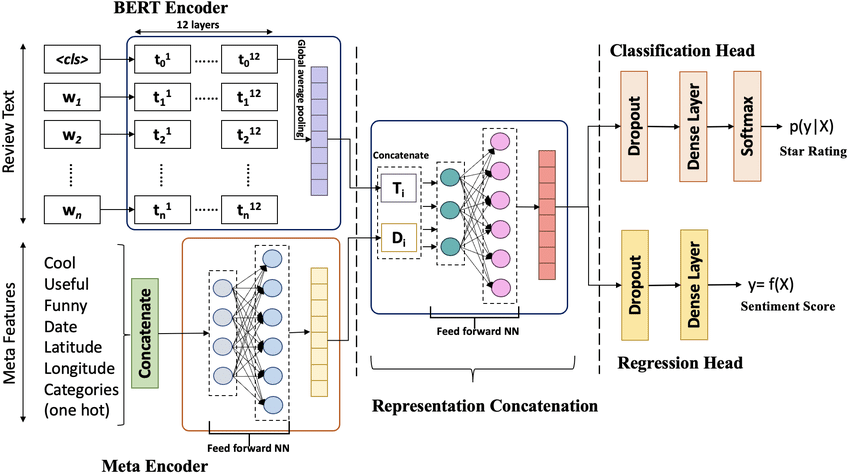]

In [ ]:
# download and load model
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=9)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Tokenize and Aligment of Labels**

 This function tokenizes the input samples using the provided tokenizer, and aligns the NER tags  with the tokenized input. It ensures that the labels are correctly mapped to the tokens, handling cases where tokens may be split into multiple sub-tokens. The alignment can be adjusted based on whether all tokens should be labeled or only the first token of each word.

In [ ]:
# tokenize and align the labels
def preprocess_data(samples, label_all_tokens=True):
  """
  Function to tokenize and align the labels for a given set of samples.

  Input:
  samples (dict): A dictionary containing the input tokens and their corresponding NER tags.
                 - tokens: list of words
                 - ner_tags: list of NER tags corresponding to the words
  label_all_tokens (bool): A flag indicating whether all sub-tokens should be labeled.

  Output:
  token_inputs (dict): A dictionary containing the tokenized inputs and their corresponding labels.
                       - input_ids: list of token IDs
                       - attention_mask: list of attention masks
                       - labels: list of labels corresponding to the tokens
  """
  # tokenise the input samples by splitting the words and doing truncation
  token_inputs = tokenizer(samples["tokens"], truncation=True, is_split_into_words=True)
  # create a empty list to store list
  class_labels = []
  # create a loop to iterate through each sample in the input data
  for i, class_label in enumerate(samples["ner_tags"]):
      # get the word ids for the current sample
      word_ids = token_inputs.word_ids(batch_index=i)
      # create an empty list to store the class labels for the current sample
      previous_word_indexes = None
      # create an empty list to store the class labels for the current sample
      class_label_indices = []
      # iterate through each word in the sample
      for word_indexes in word_ids:
          # check if the current word is None
          if word_indexes is None:
              # append -100 to the class label indices
              class_label_indices.append(-100)
          # If the word index is different from the previous one, add the label for the new word
          elif word_indexes != previous_word_indexes:
              class_label_indices.append(class_label[word_indexes])
          else:
              class_label_indices.append(class_label[word_indexes] if label_all_tokens else -100)

          # update the previous word index
          previous_word_indexes = word_indexes
      # append the class label indices to the class labels list
      class_labels.append(class_label_indices)
  # Add the aligned labels to the tokenized inputs
  token_inputs["labels"] = class_labels
  # Return the tokenized inputs
  return token_inputs

In [ ]:
# apply the preprocess_data function to apply tokenise all the data
token_data = conll_data.map(preprocess_data, batched=True)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

## **TrainingArguments**

In [ ]:
training_args = TrainingArguments(
    output_dir='model_logs',  # saves the model checkpoints and logs
    evaluation_strategy = 'epoch',  # used to evalaute the performance of the model after each epoch
    per_device_train_batch_size=32, # train batch size
    per_device_eval_batch_size=32,  # test batch size
    num_train_epochs=3,  # number of epochs
    weight_decay=0.001, #  Weight decay for regularization to prevent overfitting
    learning_rate=1e-5, # learning rate
    fp16=True, # # Whether to use mixed precision training (FP16) to speed up training and reduce memory usage
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


The following below cell:

1. Initialize the data collator for token classification tasks
2. This collator is responsible for dynamically padding the inputs and labels
3. to the maximum length within a batch, ensuring that all sequences in the batch
4. are of equal length. It also handles special tokens and alignment of labels with tokens.

In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer)

## **Model Training**

In [ ]:
def evaluate_model(eval_preds):
    """
    Function to compute the evaluation metrics for NER tasks.
    The function computes precision, recall, F1 score, and accuracy.

    Parameters:
    eval_preds (tuple): A tuple containing the predicted logits and the true labels.

    Returns:
    A dictionary containing the precision, recall, F1 score, and accuracy.
    """
    pred_logits, labels = eval_preds

    # Get the predicted labels
    pred_labels = np.argmax(pred_logits, axis=2)  # Change axis to 2 for token classification

    # Flatten the lists and remove -100 labels
    true_labels = [label for sublist in labels for label in sublist if label != -100]
    pred_labels = [label for sublist_pred, sublist_true in zip(pred_labels, labels)
                   for label, true in zip(sublist_pred, sublist_true) if true != -100]

    # Compute metrics
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=1)
    accuracy = accuracy_score(true_labels, pred_labels)

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy
    }


In [ ]:
# Initialize the Trainer for model training and evaluation
train_model = Trainer(  # Initialize the Trainer for model training and evaluation
   model, # model that will be trained
   training_args, # training arguments
   train_dataset=token_data["train"], # train dataset
   eval_dataset=token_data["validation"],  # validation dataset
   data_collator=data_collator,     # The data collator used for dynamically padding the inputs and labels within each batch
   tokenizer=tokenizer,  # The tokenizer used to process the inputs and labels
   compute_metrics=evaluate_model, # Function to compute evaluation metrics after each evaluation phase
)

In [ ]:
# train the model trainer
train_model.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.087896,0.974995,0.975376,0.975018,0.975376
2,0.272300,0.067832,0.980657,0.980714,0.980666,0.980714
3,0.076300,0.065663,0.981254,0.981159,0.981194,0.981159


TrainOutput(global_step=1317, training_loss=0.14647784338091574, metrics={'train_runtime': 189.3088, 'train_samples_per_second': 222.509, 'train_steps_per_second': 6.957, 'total_flos': 1129700749077486.0, 'train_loss': 0.14647784338091574, 'epoch': 3.0})

The results are good with the final accuracy score as 98% same for other metrcis. Log Loss for validation is also less indicating good sign.

In [ ]:
# save the model
train_model.save_model('best_model')

In [ ]:
# save the tokenizer
tokenizer.save_pretrained('tokens')

('tokens/tokenizer_config.json',
 'tokens/special_tokens_map.json',
 'tokens/vocab.txt',
 'tokens/added_tokens.json',
 'tokens/tokenizer.json')

## **Test The Model**

In [ ]:
import json
from transformers import pipeline

In [ ]:
# Load the configuration from the JSON file of the best model
config = json.load(open("best_model/config.json"))

In [ ]:
# list the labels
label_list = conll_data["train"].features["ner_tags"].feature.names

In [ ]:
# Create a mapping from label IDs to label names
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
# Create a mapping from label names to label IDs
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

In [ ]:
config["id2label"] = id2label # Update the configuration with the label mappings
# Adding the label2id mapping to the configuration dictionary, which maps label names to label IDs
config["label2id"] = label2id

In [ ]:
# Save the updated configuration dictionary back to the JSON file
json.dump(config, open("best_model/config.json","w"))

In [ ]:
# Load the fine-tuned model for token classification
model_fine_tuned = AutoModelForTokenClassification.from_pretrained("best_model")

In [ ]:
# This sets up the pipeline to process text and identify named entities using the model and tokenizer
test_data = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)

# test sentence for NER
test = "Elon Reeve Musk FRS is a businessman and investor known for his key roles in space company SpaceX and automotive company Tesla, Inc"

# Use the NER pipeline to process the test sentence and get the NER Results
ner_results = test_data(test)

# Print the results
print(ner_results)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'entity': 'B-PER', 'score': 0.9799785, 'index': 1, 'word': 'el', 'start': 0, 'end': 2}, {'entity': 'B-PER', 'score': 0.9872989, 'index': 2, 'word': '##on', 'start': 2, 'end': 4}, {'entity': 'I-PER', 'score': 0.9932173, 'index': 3, 'word': 'reeve', 'start': 5, 'end': 10}, {'entity': 'I-PER', 'score': 0.9890778, 'index': 4, 'word': 'mu', 'start': 11, 'end': 13}, {'entity': 'I-PER', 'score': 0.9887939, 'index': 5, 'word': '##sk', 'start': 13, 'end': 15}, {'entity': 'I-PER', 'score': 0.45749286, 'index': 6, 'word': 'frs', 'start': 16, 'end': 19}, {'entity': 'B-ORG', 'score': 0.9538591, 'index': 20, 'word': 'space', 'start': 91, 'end': 96}, {'entity': 'B-ORG', 'score': 0.97047555, 'index': 21, 'word': '##x', 'start': 96, 'end': 97}, {'entity': 'B-ORG', 'score': 0.97191745, 'index': 25, 'word': 'tesla', 'start': 121, 'end': 126}, {'entity': 'I-ORG', 'score': 0.7408845, 'index': 26, 'word': ',', 'start': 126, 'end': 127}]


In [ ]:
# test sentence for NER
test1 = "Sundar Pichai is CEO of Google"

# Use the NER pipeline to process the test sentence and get the NER Results
ner_results1 = test_data(test1)

# Print the results
print(ner_results1)

[{'entity': 'B-PER', 'score': 0.99517727, 'index': 1, 'word': 'sun', 'start': 0, 'end': 3}, {'entity': 'B-PER', 'score': 0.9953511, 'index': 2, 'word': '##dar', 'start': 3, 'end': 6}, {'entity': 'I-PER', 'score': 0.9952053, 'index': 3, 'word': 'pic', 'start': 7, 'end': 10}, {'entity': 'I-PER', 'score': 0.9948932, 'index': 4, 'word': '##hai', 'start': 10, 'end': 13}, {'entity': 'B-ORG', 'score': 0.9582303, 'index': 8, 'word': 'google', 'start': 24, 'end': 30}]


In [ ]:
# test sentence for NER
test2 = "Jeffrey Preston Bezos is an American business and former president and CEO of Amazon,"

# Use the NER pipeline to process the test sentence and get the NER Results
ner_results2 = test_data(test2)

# Print the results
print(ner_results2)

[{'entity': 'B-PER', 'score': 0.99397427, 'index': 1, 'word': 'jeffrey', 'start': 0, 'end': 7}, {'entity': 'I-PER', 'score': 0.9855574, 'index': 2, 'word': 'preston', 'start': 8, 'end': 15}, {'entity': 'I-PER', 'score': 0.99588877, 'index': 3, 'word': 'be', 'start': 16, 'end': 18}, {'entity': 'I-PER', 'score': 0.99570966, 'index': 4, 'word': '##zos', 'start': 18, 'end': 21}, {'entity': 'B-MISC', 'score': 0.9735613, 'index': 7, 'word': 'american', 'start': 28, 'end': 36}, {'entity': 'B-ORG', 'score': 0.9727328, 'index': 15, 'word': 'amazon', 'start': 78, 'end': 84}]


## **Challenges**

1. First challenge that came was while writing the function of tokenization as few of the time it was implemented in a wrong way.
2. Another challenge that came was evaluting the model and selecting the parameters to train the model for which some paper were referred and parameters were added.